# Project description
Urban mobility significantly contributes to global environmental impact. With the growth in urbanareas worldwide, cities are implementing policies to focus on sustainable urban and mobility devel-opment. Urban areas exhibit high variability in structure, economic output, mobility behaviour,among others. Pinpointing to the exact causes of emissions is impossible. However, understandingthe relationship of mobility with infrastructure resources and other urban indicators may help gov-ernments predict long-term mobility behaviour and intervene with future pathways into sustainablemobility options. </br>

Project goals: You are tasked to identify how mobility is related to the infrastructural form of acity and across multiple cities. Use your findings toward helping governments transform mobilitywithin cities for reducing environmental impacts of mobility use.
Data: </br>
1. Local city-wide indicators of urban mobility: Multi-city Traffic Datasetprovided publicly byThe Institute for Transport Planning and Systems at ETH Zurich.
2. Global city-wide indicators of urban mobility and environmental impacts:Urban TypologiesProject[Reference]3.Get indicators for infrastructure resources from OSMNX (street networks) and PYROSM(amenities and points of interest) python packages.High-level project goals1.Explore, Investigate, and Visualize various factors of the mobility data across cities of interest.2.Describe and incorporate additional data sources that you will use to help you understandrelationships between mobility and the built environment.
3. Identify correlations between mobility and the built environment.4.Perform clustering or LISA analysis on city streets where congestion may be related stronglywith the presence of certain amenities. Think about how that may vary with distance toamenities.
4. Or, train and evaluate models using the mobility data (either as predictors or as the primaryresponse in some fashion) and your data sources.
6. Use and interpret your models to discuss the causes and correlations of or effects due todifferences in congestion across cities or within a city of your choice.
7. Aggregate city-wide findings to correlate with environmental indicators used in data set (2) -urban typology - to comment on policy initiatives of the governments. (Think how you mayaggregate city-wide findings to a single score for the whole city to compare with indicatorsused in data set 

(2))Note: Not all data may be available for all cities. Hence, conduct this analysis for at least5citiesoverlapping between sets1and2in the data. You are welcome to do the analysis in many morecities.


In [41]:
# import 
import pandas as pd
import geopandas as gpd
import osmnx as ox
import matplotlib.pyplot as plt
import numpy as np
import pyrosm as py
import seaborn as sns
import pickle
import contextily as ctx



### Load graphs

In [2]:
UTD19 = pd.read_csv('Data/detectors_public.csv') # read big file with all cities 
newcitylist= [ 'munich', 'rotterdam', 'frankfurt', 'hamburg', 'zurich'] # find only our cities for now, store in dataframe
UTD19Cities = UTD19.loc[UTD19.citycode.isin(newcitylist)] # UTD19Cities is dataframe

In [3]:
def GetGraphs(df):
    # function designed to extract bbox and create graphs with bbox
    clist = df.citycode.unique()
    GraphList = []
    for i in clist:
        maxlonglt = df.loc[df.citycode == i, ['long', 'lat']].max() # maxlonglat[0] = long, 1 lat
        minlonglt = df.loc[df.citycode == i, ['long', 'lat']].min() #
        north = maxlonglt[1] 
        south = minlonglt[1]
        east = maxlonglt[0]
        west = minlonglt[0]
        A = ox.graph.graph_from_bbox(north, south, east, west, network_type='drive')
        GraphList.append(A)
    return GraphList
        
Graphs = GetGraphs(UTD19Cities)

### Load POIS

In [4]:
# de filepaths zin nu specifiek voor mijn computer, moet je zelf even aanpassen naar waar die van jou staan
fp_rotterdam ="data/rotterdam.osm.pbf"
fp_munich ="data/munich.osm.pbf"
fp_zurich ="data/zurich.osm.pbf"
fp_hamburg ="data/hamburg.osm.pbf"
fp_frankfurt ="data/frankfurt.osm.pbf"

C:\Users\hanna\Anaconda3\envs\gds\lib\site-packages\pyrosm\pois.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  osm_keys=None,
C:\Users\hanna\Anaconda3\envs\gds\lib\site-packages\pyrosm\pois.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  osm_keys=None,
C:\Users\hanna\Anaconda3\envs\gds\lib\site-packages\pyrosm\pois.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify

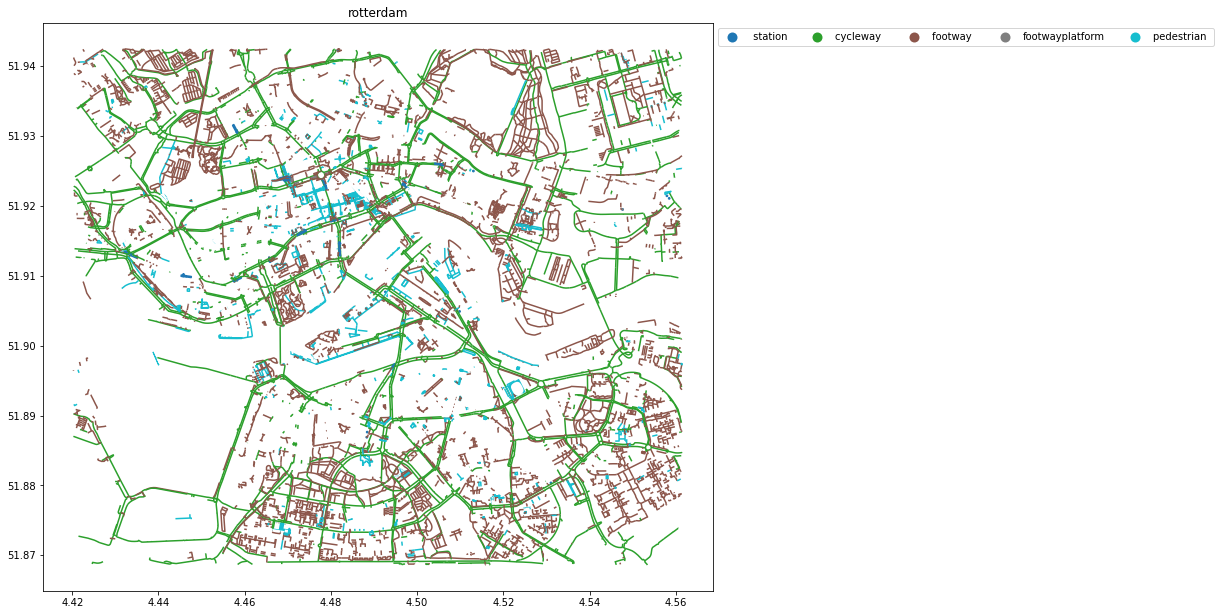

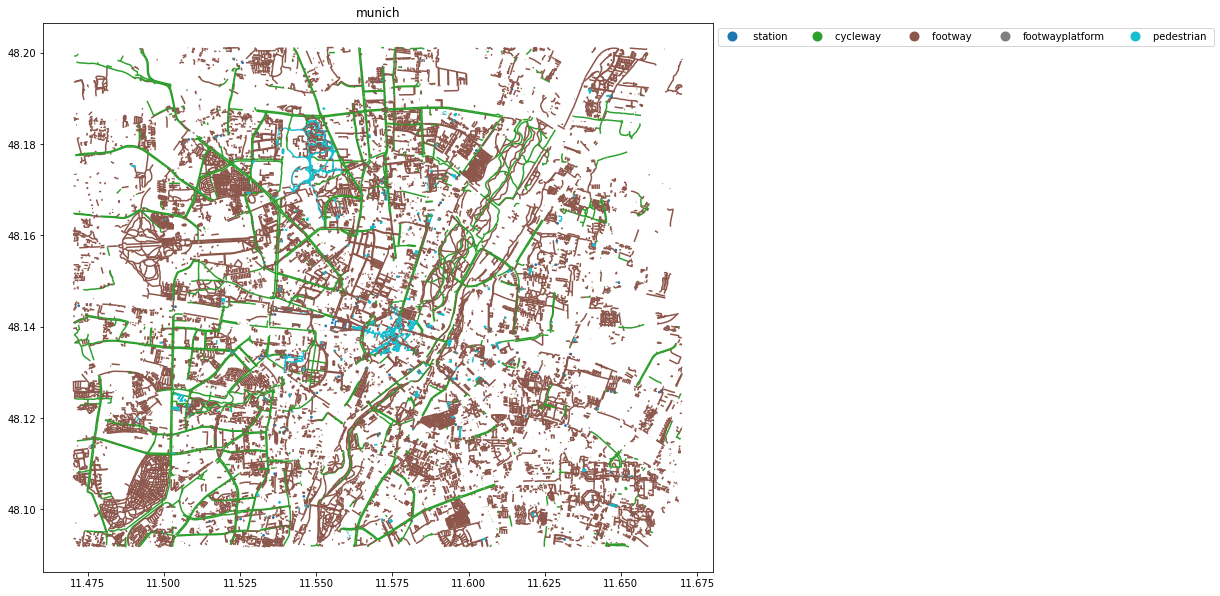

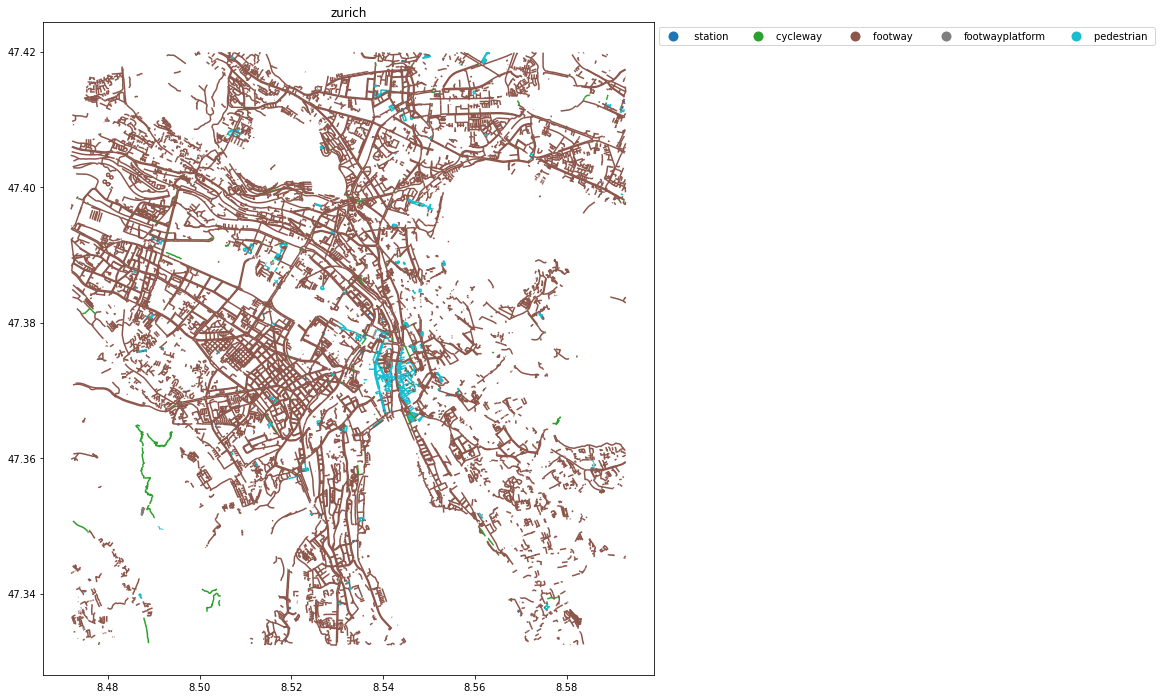

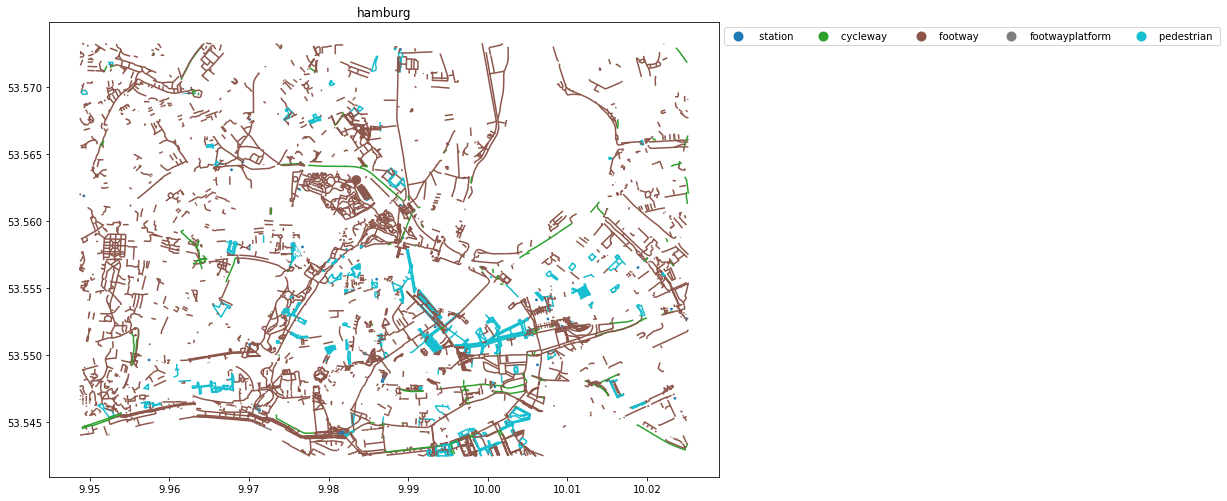

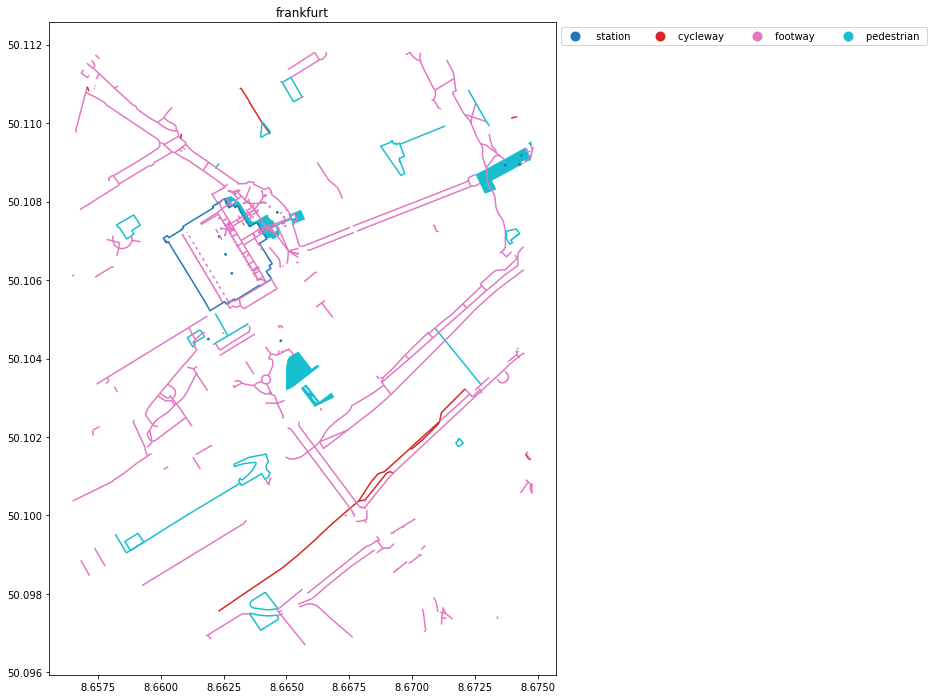

In [5]:
#alternative transport options
PoisDic = dict()
for i,v in [(fp_rotterdam, 'rotterdam'), (fp_munich, 'munich') , (fp_zurich, 'zurich'), (fp_hamburg, 'hamburg'), (fp_frankfurt, 'frankfurt')]:    # Initiliaze with bounding box
    osm = py.OSM(filepath=i)

    # By default pyrosm reads all elements having "amenity", "shop" or "tourism" tag
    # Here, let's read only "amenity" and "shop" by applying a custom filter that
    # overrides the default filtering mechanism
    custom_filter = {'public_transport': ['station'], 'highway': ['pedestrian', 'footway', 'cycleway', 'busway']}
    pois = osm.get_pois(custom_filter=custom_filter)

    # Gather info about POI type (combines the tag info from "amenity" and "shop")
    pois["public_transport"] = pois["public_transport"].fillna(" ")
    pois["highway"] = pois["highway"].fillna(" ")
    pois["poi_type"] = pois["highway"] + pois['public_transport']
    
    # save pois in dict
    PoisDic[v] = pois

    # Plot
    ax = pois.plot(column='poi_type', markersize=3, figsize=(12,12), legend=True, legend_kwds=dict(loc='upper left', ncol=5, bbox_to_anchor=(1, 1)))
    ax.set_title(v)
    pois.head()

In [6]:
PoisDic['rotterdam'].head() # stored in dataframe

lat  changeset          id  timestamp  \
0  51.921089      -37.0  1889797480         38   
1  51.887630      -45.0  2032859196          0   
2  51.917953       24.0  3149917961          0   
3  51.930611       29.0  3149917962          0   
4  51.914028       19.0  3149917967        -64   

                                                tags  version       lon  \
0              {"bus":"yes","amenity":"bus_station"}      -91  4.558490   
1  {"bus":"yes","zone":"5175","source":"Arriva","...        0  4.488421   
2  {"zone":"5300","subway":"yes","railway":"stati...        0  4.480911   
3  {"zone":"5300","subway":"yes","network":"Rail ...        0  4.458148   
4  {"zone":"5300","subway":"yes","network":"Rail ...       64  4.481973   

  addr:country               name                                 operator  \
0         None  Capelsebrug Metro                                     None   
1         None          Zuidplein                                     None   
2         None              Beurs  Rotterdamse Elektrische Tram N.V. (RET)   
3           NL           Blijdorp                                      RET   
4         None         Leuvehaven                                      RET   

   ... service segregated sidewalk smoothness surface tracktype tunnel width  \
0  ...     NaN        NaN      NaN        NaN     NaN       NaN    NaN   NaN   
1  ...     NaN        NaN      NaN        NaN     NaN       NaN    NaN   NaN   
2  ...     NaN        NaN      NaN        NaN     NaN       NaN    NaN   NaN   
3  ...     NaN        NaN      NaN        NaN     NaN       NaN    NaN   NaN   
4  ...     NaN        NaN      NaN        NaN     NaN       NaN    NaN   NaN   

  website  poi_type  
0     NaN   station  
1     NaN   station  
2     NaN   station  
3     NaN   station  
4     NaN   station  

[5 rows x 40 columns]

# Save POI pickle

In [7]:
with open('POI.pickle', 'wb') as handle:
    pickle.dump(PoisDic, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [44]:
## Load POI pickle
# Load data (deserialize)
with open('POI.pickle', 'rb') as handle:
    poi_dic = pickle.load(handle)

### Load pickle

In [9]:
# Load data (deserialize)
with open('Edges.pickle', 'rb') as handle:
    dic = pickle.load(handle)

dic['rotterdam'].head()


osmid                     name      highway  \
0  [311806104, 311806106, 321898179]             's-Gravenweg  residential   
1                            7514536       Frans Bekkerstraat  residential   
2                            7515679       Frans Bekkerstraat  residential   
3                 [7515714, 7515628]            Verboomstraat  residential   
4                            7319072  Schultz van Hagenstraat  residential   

   oneway   length bridge                                           geometry  \
0   False   88.311    yes  LINESTRING (4.52452 51.92392, 4.52412 51.92331...   
1   False   61.119    NaN    LINESTRING (4.46527 51.89180, 4.46613 51.89165)   
2   False   76.835    NaN  LINESTRING (4.46527 51.89180, 4.46496 51.89218...   
3   False  145.552    NaN  LINESTRING (4.46527 51.89180, 4.46528 51.89177...   
4   False   48.438    NaN    LINESTRING (4.52872 51.92385, 4.52848 51.92344)   

  maxspeed lanes  ref junction tunnel access         u          v  key detid  
0      NaN   NaN  NaN      NaN    NaN    NaN  44417024  771255062    0   NaN  
1      NaN   NaN  NaN      NaN    NaN    NaN  44269570   44269098    0   NaN  
2       50   NaN  NaN      NaN    NaN    NaN  44269570  963879003    0   NaN  
3       50   NaN  NaN      NaN    NaN    NaN  44269570   44262667    0   NaN  
4      NaN   NaN  NaN      NaN    NaN    NaN  44417028   44412933    0   NaN

### Load flows

In [10]:
data_frankfurt = pd.read_csv('data\\UTD_f.csv')
data_hamburg = pd.read_csv('data/UTD_h.csv')
data_munich = pd.read_csv('data\\UTD_m.csv')
data_rotterdam = pd.read_csv('data\\UTD_r.csv')
data_zurich = pd.read_csv('data\\UTD_z.csv')

In [11]:
frankfurt_detid_average = (data_frankfurt.groupby('detid').flow.mean()).to_frame(name = None)
hamburg_detid_average = (data_hamburg.groupby('detid').flow.mean()).to_frame(name = None)
munich_detid_average = (data_munich.groupby('detid').flow.mean()).to_frame(name = None)
rotterdam_detid_average = (data_rotterdam.groupby('detid').flow.mean()).to_frame(name = None)
zurich_detid_average = (data_zurich.groupby('detid').flow.mean()).to_frame(name = None)

In [12]:
frankfurt_detid_average['city'] = 'frankfurt'
hamburg_detid_average['city'] = 'hamburg'
munich_detid_average['city'] = 'munich'
rotterdam_detid_average['city'] =  'rotterdam'
zurich_detid_average['city'] = 'zurich'

In [13]:
# most Functions dont use this
Mean_perdetid = pd.concat([frankfurt_detid_average,
                                  hamburg_detid_average,
                                  munich_detid_average,
                                  rotterdam_detid_average,
                                  zurich_detid_average])
          

In [14]:
result = Mean_perdetid.to_csv('data\\UTD_Mean_Flow_per_detid.csv', index = True)#exporting data frame as csv file.

### Load flows as edge atributes

In [15]:
# try plotting the flow on the OSMNX graph
hamburg_detid_average.reset_index(inplace = True)
frankfurt_detid_average.reset_index(inplace = True)
munich_detid_average.reset_index(inplace = True)
rotterdam_detid_average.reset_index(inplace = True)
zurich_detid_average.reset_index(inplace = True)

#df['ColumnID'] = df['ColumnID'].astype(str)
munich_detid_average.detid = munich_detid_average.detid.astype(str)

In [16]:
H = dic['hamburg']
def Match(detid, df):
    if type(detid) == str:
        flowval = df.loc[df.detid == detid, 'flow'].values # get specific value
        try:
            flowval = float(flowval) # convert array to float
            return flowval
        except:
            # list empty
            return np.nan
    
    
H['flow'] = H['detid'].apply(Match, args = [hamburg_detid_average])
#H['detid'].apply(Match, args = [hamburg_detid_average])
    

In [17]:
F = dic['frankfurt']
# H = dic['Hamburg'] # skip, allready done
M = dic['munich']
R = dic['rotterdam']
Z = dic['zurich']

F['flow'] = F['detid'].apply(Match, args = [frankfurt_detid_average])
M['flow'] = M['detid'].apply(Match, args = [munich_detid_average])
R['flow'] = R['detid'].apply(Match, args = [rotterdam_detid_average])
Z['flow'] = Z['detid'].apply(Match, args = [zurich_detid_average])
H['flow'] = H['detid'].apply(Match, args = [hamburg_detid_average])


C:\Users\hanna\Anaconda3\envs\gds\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\hanna\Anaconda3\envs\gds\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  after removing the cwd from sys.path.
C:\Users\hanna\Anaconda3\envs\gds\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  
C:\Users\hanna\Anaconda3\envs\gds\lib\site-packages\ipykernel_launcher.py:7: UserWarning:

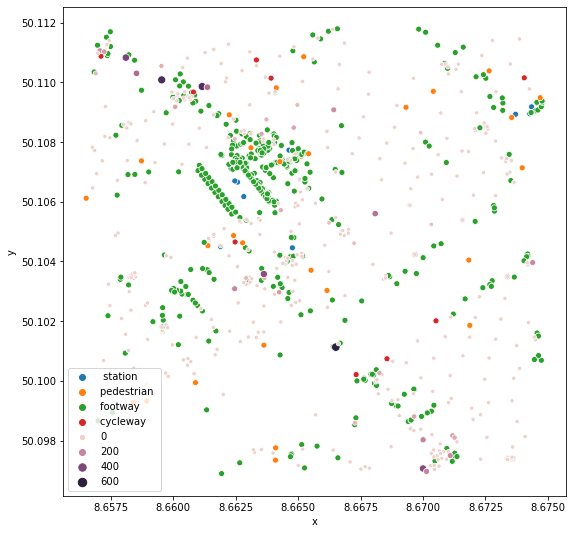

In [45]:
f, ax = plt.subplots(figsize=(9,9))
pois = PoisDic['frankfurt']
pois['x'] = pois.geometry.centroid.x
pois['y'] = pois.geometry.centroid.y
sns.scatterplot(x = 'x', y = 'y', ax = ax, data = pois, hue = pois['poi_type'].to_list())
F['x'] = F.geometry.centroid.x
F['y'] = F.geometry.centroid.y
flows = sns.scatterplot(x = 'x', y = 'y', ax =ax , data = F, hue = F['flow'].to_list(), size = F['flow'].to_list())
#plt.colorbar(flows)
#ax.legend()

C:\Users\hanna\Anaconda3\envs\gds\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  if __name__ == '__main__':
C:\Users\hanna\Anaconda3\envs\gds\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  # Remove the CWD from sys.path while we load stuff.
C:\Users\hanna\Anaconda3\envs\gds\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  if __name__ == '__main__':
C:\Users\hanna\Anaconda3\envs\gds\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Geometry i

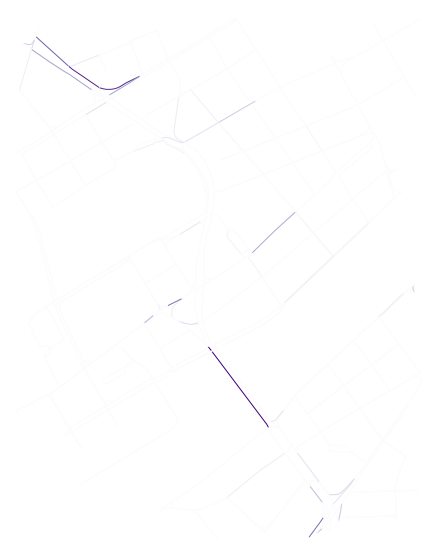

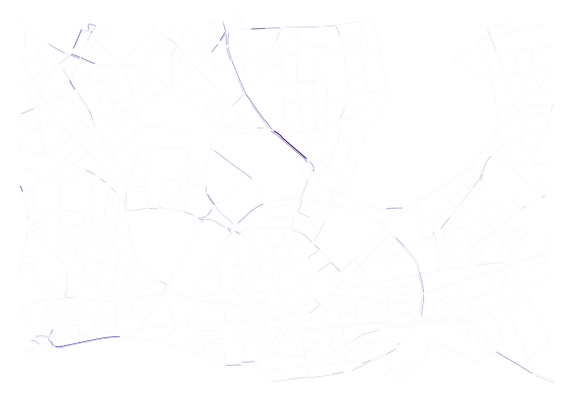

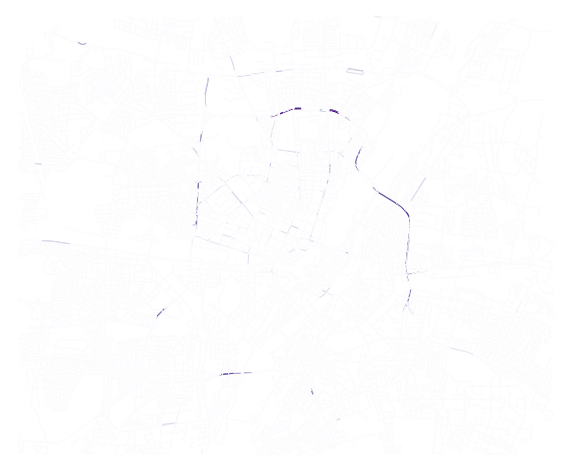

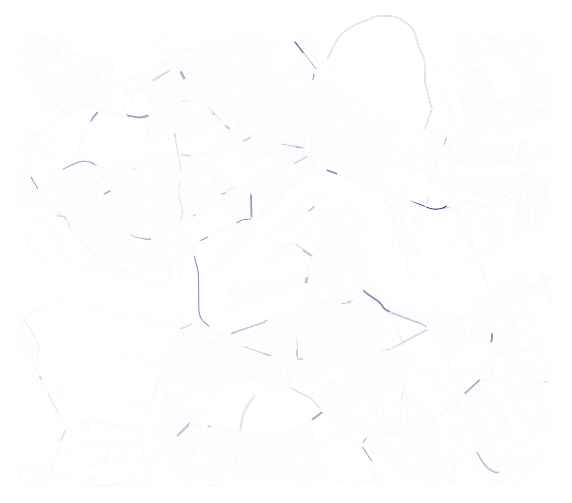

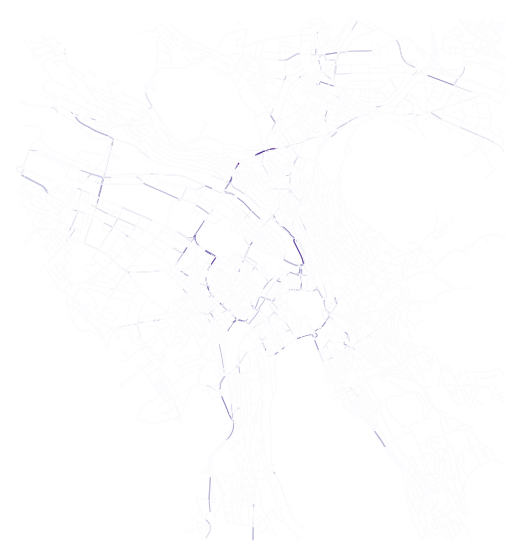

In [22]:
FlowDict = {'rotterdam':R ,'zurich': Z,'munich':M, 'frankfurt':F, 'hamburg':H}

def CreatePlots(GList, PDict, Clist = UTD19Cities.citycode.unique(), flowdict = FlowDict): 
    # need to run UTD19Cities, GetGraphs and need the POIS Dic
    for number,city in enumerate(Clist):
        GraphCity = GList[number]
        # plot build enviroment vs traffic flows 
        pois = PoisDic[city]
        pois['x'] = pois.geometry.centroid.x
        pois['y'] = pois.geometry.centroid.y
        
        N_d, remove = ox.graph_to_gdfs(GraphCity)
        Edge_df = FlowDict[city] # retrieve edge data
        Edge_df['flow'] = Edge_df.flow.fillna(0) # necessary for plotting colors
        New = ox.graph_from_gdfs(N_d, Edge_df, graph_attrs={'edge_attr': ['detid', 'flow']} )
        New.graph['crs'] = GraphCity.graph['crs']

        # setup plot
        f, ax = plt.subplots(figsize = (10,10))
        ec = ox.plot.get_edge_colors_by_attr(New, attr='flow', cmap='Purples') # set color scale by atribute (now length could be any other variable)
        z = ox.plot_graph(New, edge_color= ec, node_size=1, ax =ax, show = False, close = False) # edgecolor is stored in ec
        # uncomment line below if build enviroment also neccessary
        #sns.scatterplot(x = 'x', y = 'y', ax = ax, data = pois , hue = pois['poi_type'].to_list(), alpha = 0.3, size = 0.3)
 
        
CreatePlots(Graphs, PoisDic)

# Spatial weights (rough)
Example FrankFurt

In [ ]:
# retrieve Pois dic
#pois = PoisDic['frankfurt']
#pois.crs # crs is still in degrees -> reprojection necessary

In [ ]:
#pois = pois.to_crs('EPSG:4839')
#pois.crs # worked, now in metres

In [ ]:
from pysal.lib import weights
# get projections in meters
#pois['X'] = pois.geometry.centroid.x
#pois['Y'] = pois.geometry.centroid.y

# calculate using array, if binary = True -> 1 if neighbour, threshold in meters
w = weights.distance.DistanceBand.from_array(pois[['X','Y']], threshold = 250, binary = False) 
w[0] # example of w

In [ ]:
# Validation of W
# Setup figure
f, ax = plt.subplots(1, figsize=(9, 9))
# get neighbours
neis = w[300]
pois['neis'] = 0

for key in neis.keys():
    pois.loc[key,'neis'] = 1 # if neighbour is 1, otherwise 0 
# Plot base layer of polygons
sns.scatterplot(x= 'X', y = 'Y', ax=ax, data = pois, hue = pois['neis'].to_list())
# get first one -> plot in red
data = pois.iloc[300][['X','Y']]
ax.scatter(data.X, data.Y, color = 'red')

### count point inside buffer and stuff

In [23]:
pois.head()

lat  changeset         id  timestamp  \
0  50.108929        0.0  140149879         -1   
1  50.106655       -1.0  205364328          0   
2  50.107113       -1.0  677374148          0   
3  50.108944       -3.0  759943999         -1   
4  50.107727      -96.0  767185691          0   

                                                tags  version       lon  \
0                  {"tram":"yes","wheelchair":"yes"}        0  8.673705   
1  {"note":"25 tracks with passenger platforms","...        0  8.662580   
2  {"train":"yes","railway":"station","uic_ref":"...        0  8.662321   
3  {"subway":"yes","railway":"tram_stop","wheelch...        0  8.674273   
4  {"tram":"yes","railway":"tram_stop","wheelchai...        0  8.664636   

           addr:city addr:postcode addr:street  ... smoothness surface width  \
0               None          None        None  ...        NaN     NaN   NaN   
1  Frankfurt am Main         60329        None  ...        NaN     NaN   NaN   
2               None          None        None  ...        NaN     NaN   NaN   
3               None          None        None  ...        NaN     NaN   NaN   
4               None          None        None  ...        NaN     NaN   NaN   

  cycleway sidewalk  poi_type         X          Y         x          y  
0      NaN      NaN   station  8.673705  50.108929  8.673705  50.108929  
1      NaN      NaN   station  8.662580  50.106655  8.662580  50.106655  
2      NaN      NaN   station  8.662321  50.107113  8.662321  50.107113  
3      NaN      NaN   station  8.674273  50.108944  8.674273  50.108944  
4      NaN      NaN   station  8.664636  50.107727  8.664636  50.107727  

[5 rows x 38 columns]

In [26]:
pois.groupby('poi_type').poi_type.count()


poi_type
 station        12
cycleway        10
footway        459
pedestrian      28
Name: poi_type, dtype: int64

In [27]:
F.head()

osmid  oneway lanes   ref                name      highway maxspeed  \
0  42367702    True     2  B 44  Platz der Republik      primary       50   
1  42368106    True     2   NaN  Mainzer Landstraße      primary       50   
2   4514490    True   NaN   NaN         Weserstraße  residential      NaN   
3  49967814    True     2   NaN  Mainzer Landstraße      primary      NaN   
4  39503239   False   NaN   NaN       Westendstraße  residential      NaN   

    length                                           geometry access bridge  \
0   13.290    LINESTRING (8.66082 50.10948, 8.66068 50.10956)    NaN    NaN   
1  216.018  LINESTRING (8.66082 50.10948, 8.66093 50.10954...    NaN    NaN   
2    7.553    LINESTRING (8.66636 50.11180, 8.66641 50.11174)    NaN    NaN   
3  255.460  LINESTRING (8.66636 50.11180, 8.66620 50.11173...    NaN    NaN   
4    9.859    LINESTRING (8.66331 50.11060, 8.66338 50.11052)    NaN    NaN   

  junction tunnel       u          v  key detid  flow         x          y  
0      NaN    NaN  162595  495023287    0   NaN   0.0  8.660750  50.109525  
1      NaN    NaN  162595     604188    0   NaN   0.0  8.662094  50.110015  
2      NaN    NaN  558661     613254    0   NaN   0.0  8.666385  50.111771  
3      NaN    NaN  558661     558662    0   NaN   0.0  8.664836  50.111187  
4      NaN    NaN  558662     604188    0   NaN   0.0  8.663342  50.110560

In [35]:
filtered_F = F[F['detid'].notnull()]
filter_F = filtered_F[['detid', 'flow', 'x', 'y' ]]

In [36]:
filter_F.head()

detid        flow         x          y
14          T1_D2   60.129496  8.666159  50.108355
18  STA2_D4(KFZ4)   70.794979  8.667279  50.098595
20   WL2_D2(KFZ3)  102.202247  8.669478  50.105882
22    G3_D2(KFZ1)  254.675958  8.668088  50.105600
35    SD_D1(KFZ1)  206.479705  8.673383  50.103486

In [55]:
UTD19 = pd.read_csv('Data/detectors_public.csv') # read big file with all cities 
newcitylist= [ 'munich', 'rotterdam', 'frankfurt', 'hamburg', 'zurich'] # find only our cities for now, store in dataframe
UTD19Cities = UTD19.loc[UTD19.citycode.isin(newcitylist)] # UTD19Cities is dataframe
df2 = UTD19Cities.loc[UTD19Cities.citycode == 'frankfurt']


In [56]:
df2.head()

detid    length       pos   fclass             road limit  \
3441   STA4_D1(KFZ1)  0.129484  0.039710  primary  Stresemannallee    50   
3442  STA4_D1a(KFZ1)  0.131666  0.041698  primary  Stresemannallee    50   
3443   STA4_D2(KFZ2)  0.131590  0.042400  primary  Stresemannallee    50   
3444  STA4_D2a(KFZ2)  0.077419  0.041444  primary  Stresemannallee    50   
3445  STA4_D8a(KFZ8)  0.254428  0.025927  primary     Kennedyallee    50   

       citycode  lanes  linkid      long        lat  
3441  frankfurt    1.0    59.0  8.670011  50.097966  
3442  frankfurt    1.0    60.0  8.670057  50.097985  
3443  frankfurt    1.0    61.0  8.670108  50.098007  
3444  frankfurt    1.0    62.0  8.670148  50.098026  
3445  frankfurt    1.0    52.0  8.670210  50.096997

<AxesSubplot:xlabel='long', ylabel='lat'>

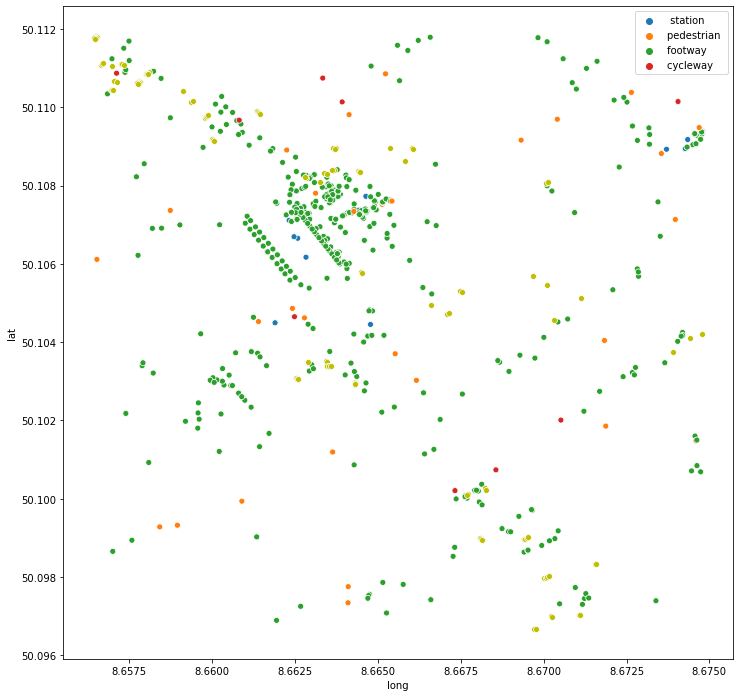

In [59]:
f,ax = plt.subplots(1,figsize=(12, 12))
sns.scatterplot(x = 'x', y = 'y', ax = ax, data = pois, hue = pois['poi_type'].to_list())
sns.scatterplot(x = 'long', y = 'lat', ax = ax, data = df2, color = 'y')

#ctx.add_basemap(ax)


In [68]:
df2_gdf = geopandas.GeoDataFrame(
    df2, geometry=geopandas.points_from_xy(df2.long, df2.lat))
pois.head()

detid    length       pos   fclass             road limit  \
3441   STA4_D1(KFZ1)  0.129484  0.039710  primary  Stresemannallee    50   
3442  STA4_D1a(KFZ1)  0.131666  0.041698  primary  Stresemannallee    50   
3443   STA4_D2(KFZ2)  0.131590  0.042400  primary  Stresemannallee    50   
3444  STA4_D2a(KFZ2)  0.077419  0.041444  primary  Stresemannallee    50   
3445  STA4_D8a(KFZ8)  0.254428  0.025927  primary     Kennedyallee    50   

       citycode  lanes  linkid      long        lat                  geometry  
3441  frankfurt    1.0    59.0  8.670011  50.097966  POINT (8.67001 50.09797)  
3442  frankfurt    1.0    60.0  8.670057  50.097985  POINT (8.67006 50.09799)  
3443  frankfurt    1.0    61.0  8.670108  50.098007  POINT (8.67011 50.09801)  
3444  frankfurt    1.0    62.0  8.670148  50.098026  POINT (8.67015 50.09803)  
3445  frankfurt    1.0    52.0  8.670210  50.096997  POINT (8.67021 50.09700)

In [104]:
pois.crs
df2_gdf.crs
df2_gdf.set_crs(epsg=4326, inplace=True, allow_override=True)
pois.head()

lat  changeset         id  timestamp  \
0  50.108929        0.0  140149879         -1   
1  50.106655       -1.0  205364328          0   
2  50.107113       -1.0  677374148          0   
3  50.108944       -3.0  759943999         -1   
4  50.107727      -96.0  767185691          0   

                                                tags  version       lon  \
0                  {"tram":"yes","wheelchair":"yes"}        0  8.673705   
1  {"note":"25 tracks with passenger platforms","...        0  8.662580   
2  {"train":"yes","railway":"station","uic_ref":"...        0  8.662321   
3  {"subway":"yes","railway":"tram_stop","wheelch...        0  8.674273   
4  {"tram":"yes","railway":"tram_stop","wheelchai...        0  8.664636   

           addr:city addr:postcode addr:street  ... smoothness surface width  \
0               None          None        None  ...        NaN     NaN   NaN   
1  Frankfurt am Main         60329        None  ...        NaN     NaN   NaN   
2               None          None        None  ...        NaN     NaN   NaN   
3               None          None        None  ...        NaN     NaN   NaN   
4               None          None        None  ...        NaN     NaN   NaN   

  cycleway sidewalk  poi_type         X          Y         x          y  
0      NaN      NaN   station  8.673705  50.108929  8.673705  50.108929  
1      NaN      NaN   station  8.662580  50.106655  8.662580  50.106655  
2      NaN      NaN   station  8.662321  50.107113  8.662321  50.107113  
3      NaN      NaN   station  8.674273  50.108944  8.674273  50.108944  
4      NaN      NaN   station  8.664636  50.107727  8.664636  50.107727  

[5 rows x 38 columns]

In [98]:
pois_meters = pois.to_crs(epsg=4839)
df2_meters = df2_gdf.to_crs(epsg=4839)

In [91]:
pois.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [90]:
pois_meters.crs

<Projected CRS: EPSG:4839>
Name: ETRS89 / LCC Germany (N-E)
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Germany - onshore
- bounds: (5.86, 47.27, 15.04, 55.09)
Coordinate Operation:
- name: LCC Germany
- method: Lambert Conic Conformal (2SP)
Datum: European Terrestrial Reference System 1989
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [101]:
df2_meters['buffer_500m'] = df2_meters.buffer(500)
df2_meters.head()

detid    length       pos   fclass             road limit  \
3441   STA4_D1(KFZ1)  0.129484  0.039710  primary  Stresemannallee    50   
3442  STA4_D1a(KFZ1)  0.131666  0.041698  primary  Stresemannallee    50   
3443   STA4_D2(KFZ2)  0.131590  0.042400  primary  Stresemannallee    50   
3444  STA4_D2a(KFZ2)  0.077419  0.041444  primary  Stresemannallee    50   
3445  STA4_D8a(KFZ8)  0.254428  0.025927  primary     Kennedyallee    50   

       citycode  lanes  linkid      long        lat  \
3441  frankfurt    1.0    59.0  8.670011  50.097966   
3442  frankfurt    1.0    60.0  8.670057  50.097985   
3443  frankfurt    1.0    61.0  8.670108  50.098007   
3444  frankfurt    1.0    62.0  8.670148  50.098026   
3445  frankfurt    1.0    52.0  8.670210  50.096997   

                            geometry  \
3441  POINT (-130821.294 -98625.862)   
3442  POINT (-130817.960 -98623.788)   
3443  POINT (-130814.256 -98621.490)   
3444  POINT (-130811.330 -98619.461)   
3445  POINT (-130809.766 -98733.893)   

                                            buffer_500m  
3441  POLYGON ((-130321.294 -98625.862, -130323.702 ...  
3442  POLYGON ((-130317.960 -98623.788, -130320.368 ...  
3443  POLYGON ((-130314.256 -98621.490, -130316.663 ...  
3444  POLYGON ((-130311.330 -98619.461, -130313.738 ...  
3445  POLYGON ((-130309.766 -98733.893, -130312.173 ...

In [102]:
joined = geopandas.sjoin(pois_meters,
                    df2_meters.set_geometry('buffer_500m')[['detid', 'buffer_500m']],
                    op="within"
                   )

In [103]:
poi_count = joined.groupby("detid")["poi_type"].count().to_frame('poi_count')
poi_count.head()

poi_count
detid                
BP2_D1            210
BP2_D2            206
BP2_D3            204
BP4_D1(1)         309
BP4_D10(3)        220

In [81]:
joined.head()

Empty GeoDataFrame
Columns: [lat, changeset, id, timestamp, tags, version, lon, addr:city, addr:postcode, addr:street, name, operator, public_transport, station, tunnel, geometry, osm_type, access, area, bicycle, bridge, foot, footway, highway, lit, motor_vehicle, oneway, segregated, smoothness, surface, width, cycleway, sidewalk, poi_type, X, Y, x, y, index_right, detid]
Index: []

[0 rows x 40 columns]

In [110]:
det_w_counts = df2.merge(poi_count, left_on='detid', right_index=True)\
                                 .fillna({"poi_count": 0})

In [149]:
det_w_counts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 3441 to 3552
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   detid      112 non-null    object  
 1   length     112 non-null    float64 
 2   pos        112 non-null    float64 
 3   fclass     112 non-null    object  
 4   road       105 non-null    object  
 5   limit      112 non-null    object  
 6   citycode   112 non-null    object  
 7   lanes      112 non-null    float64 
 8   linkid     112 non-null    float64 
 9   long       112 non-null    float64 
 10  lat        112 non-null    float64 
 11  geometry   112 non-null    geometry
 12  poi_count  112 non-null    int64   
 13  flow       112 non-null    float64 
dtypes: float64(7), geometry(1), int64(1), object(5)
memory usage: 13.1+ KB


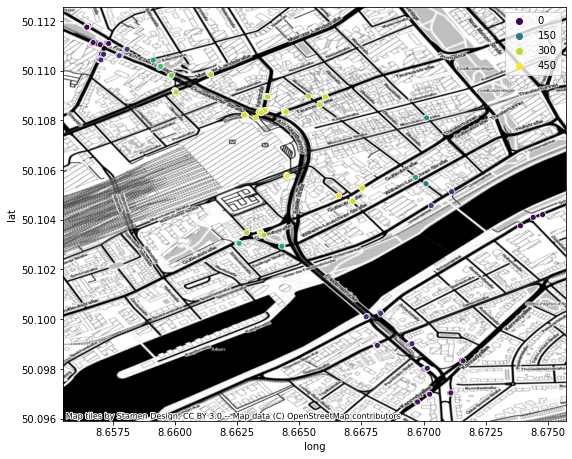

In [144]:
f, ax = plt.subplots(figsize=(9, 9))
#det_w_counts.plot(column="poi_count", 
#                scheme="quantiles", 
#                alpha=0.5,
#                legend=True, 
#                ax=ax)

sns.scatterplot(x = 'long', y = 'lat', ax = ax, data = det_w_counts, hue = det_w_counts['poi_count'].to_list(), palette = 'viridis')

contextily.add_basemap(ax, 
                      crs=df2_gdf.crs.to_string(), 
                       source=contextily.providers.Stamen.Toner
                     )

In [ ]:
pois_split = pois [['x', 'y', '']]

In [146]:

det_w_counts['flow'] = det_w_counts['detid'].apply(Match, args = [frankfurt_detid_average])


In [150]:
det_w_counts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 3441 to 3552
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   detid      112 non-null    object  
 1   length     112 non-null    float64 
 2   pos        112 non-null    float64 
 3   fclass     112 non-null    object  
 4   road       105 non-null    object  
 5   limit      112 non-null    object  
 6   citycode   112 non-null    object  
 7   lanes      112 non-null    float64 
 8   linkid     112 non-null    float64 
 9   long       112 non-null    float64 
 10  lat        112 non-null    float64 
 11  geometry   112 non-null    geometry
 12  poi_count  112 non-null    int64   
 13  flow       112 non-null    float64 
dtypes: float64(7), geometry(1), int64(1), object(5)
memory usage: 13.1+ KB


<AxesSubplot:xlabel='flow', ylabel='poi_count'>

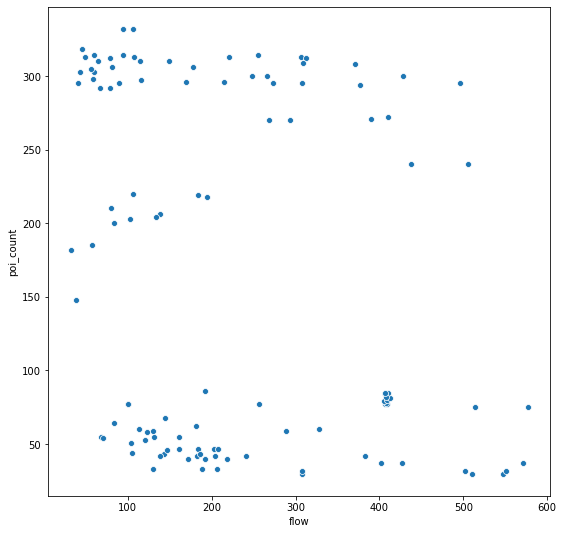

In [170]:
f, ax = plt.subplots(figsize=(9, 9))

sns.scatterplot(x = det_w_counts['flow'], y = det_w_counts['poi_count'],  ax=ax)

In [171]:
det_w_counts['poi_count'].dtype

dtype('int64')

We can visualise now the distribution of counts to get a sense of how "well-served" AirBnb properties are arranged over space (for good measure, we'll also add a legendgram):

In [ ]:
pois_split = pois [['x', 'y', 'geometry', 'poi_type']]

In [172]:
pois.columns

Index(['lat', 'changeset', 'id', 'timestamp', 'tags', 'version', 'lon',
       'addr:city', 'addr:postcode', 'addr:street', 'name', 'operator',
       'public_transport', 'station', 'tunnel', 'geometry', 'osm_type',
       'access', 'area', 'bicycle', 'bridge', 'foot', 'footway', 'highway',
       'lit', 'motor_vehicle', 'oneway', 'segregated', 'smoothness', 'surface',
       'width', 'cycleway', 'sidewalk', 'poi_type', 'X', 'Y', 'x', 'y'],
      dtype='object')

In [222]:
poi_count_stations = joined.groupby(['detid', 'poi_type'])['poi_type'].count().to_frame('poi_count')
poi_count_stations = poi_count_stations.unstack()

In [227]:
det_w_counts = df2.merge(poi_count_stations, left_on='detid', right_index=True).fillna({"pedestrian": 0, "station" : 0, "cycleway":0, "footway":0})

C:\Users\hanna\Anaconda3\envs\gds\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


In [226]:
poi_count_stations

poi_count                               
poi_type       station cycleway  footway  pedestrian 
detid                                                
BP2_D1             6.0       3.0    195.0         6.0
BP2_D2             6.0       3.0    191.0         6.0
BP2_D3             6.0       3.0    189.0         6.0
BP4_D1(1)          8.0       2.0    290.0         9.0
BP4_D10(3)         6.0       1.0    207.0         6.0
...                ...       ...      ...         ...
T1_D2              8.0       3.0    283.0         9.0
T1_D3              6.0       3.0    288.0         9.0
T1_D4              6.0       3.0    288.0         9.0
WL2_D1(KFZ1)       5.0       1.0    134.0         8.0
WL2_D2(KFZ3)       7.0       1.0    185.0        10.0

[112 rows x 4 columns]